# `Telecom Churn Prediction` : Case Study

## Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an _verage of 15-25% annual churn rate_. Given the fact that it costs _5-10 times more to acquire a new customer_ than to retain an existing one, customer retention has now become even more important than customer acquisition.

- For many incumbent operators, __retaining high profitable customers is the number one business goal.__
- To reduce customer churn, telecom companies need to __predict which customers are at high risk of churn.__
- Finally, __recommend strategies to manage customer churn__ based on your observations.

__In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.__

## Customer behaviour during churn:
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle:

1. __The `good` phase:__ In this phase, the customer is happy with the service and behaves as usual.

2. __The `action` phase:__ The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. __The `churn` phase:__ In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, we will discard all data corresponding to this phase.

In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


## Outcome of discussions with stakeholders:
- We will focus on __Usage-Based Churn__.

__`Usage-based churn:`__ `Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.`

- We need to predict churn only for the __high-value customers.__

__`High-value customers:`__ `Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).`

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',250)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Reading the data

In [2]:
#Reading and checking the dataset
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Checking the shape of the dataset
df.shape

(99999, 226)

In [4]:
#Checking the info of the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
#Checking the description of the numerical columns
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
#Checking number of unique values
unique_vals = pd.DataFrame(df.nunique(dropna=False).sort_values(ascending=False))
unique_vals.T

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,total_og_mou_7,total_og_mou_6,total_og_mou_8,total_og_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_og_mou_7,loc_ic_mou_9,std_og_mou_6,std_og_mou_8,std_og_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,onnet_mou_7,onnet_mou_6,onnet_mou_8,onnet_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_9,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_8,aug_vbc_3g,vol_3g_mb_7,vol_3g_mb_9,jul_vbc_3g,vol_2g_mb_9,vol_3g_mb_6,loc_ic_t2t_mou_6,loc_og_t2t_mou_6,loc_ic_t2t_mou_7,loc_og_t2t_mou_7,loc_ic_t2t_mou_8,loc_og_t2t_mou_8,jun_vbc_3g,loc_ic_t2t_mou_9,loc_og_t2t_mou_9,std_ic_mou_7,std_ic_mou_8,std_ic_mou_6,std_ic_mou_9,std_ic_t2m_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_8,std_ic_t2m_mou_9,arpu_3g_9,roam_og_mou_6,arpu_3g_8,arpu_3g_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_6,arpu_3g_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,arpu_2g_6,arpu_2g_9,arpu_2g_8,roam_og_mou_7,arpu_2g_7,roam_ic_mou_6,roam_og_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_9,roam_og_mou_9,isd_ic_mou_8,isd_ic_mou_7,isd_ic_mou_9,isd_ic_mou_6,roam_ic_mou_8,roam_ic_mou_7,roam_ic_mou_9,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,spl_og_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2f_mou_9,sep_vbc_3g,aon,std_ic_t2f_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_9,std_ic_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2f_mou_6,loc_og_t2c_mou_7,std_og_t2f_mou_7,total_rech_amt_8,std_og_t2f_mou_8,loc_og_t2c_mou_9,total_rech_amt_7,total_rech_amt_6,total_rech_amt_9,std_og_t2f_mou_9,loc_og_t2c_mou_6,ic_others_7,ic_others_9,ic_others_8,ic_others_6,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,og_others_6,av_rech_amt_data_8,av_rech_amt_data_7,av_rech_amt_data_9,av_rech_amt_data_6,spl_ic_mou_9,og_others_9,og_others_8,max_rech_amt_8,max_rech_amt_6,max_rech_amt_9,last_day_rch_amt_8,og_others_7,last_day_rch_amt_6,last_day_rch_amt_9,max_rech_amt_7,last_day_rch_amt_7,spl_ic_mou_7,spl_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_9,total_rech_num_8,spl_ic_mou_6,max_rech_data_8,max_rech_data_9,max_rech_data_7,max_rech_data_6,total_rech_data_8,total_rech_data_7,total_rech_data_9,total_rech_data_6,count_rech_2g_7,sachet_2g_7,count_rech_2g_8,sachet_2g_8,count_rech_2g_9,sachet_2g_6,date_of_last_rech_8,sachet_2g_9,date_of_last_rech_data_8,count_rech_2g_6,date_of_last_rech_data_7,date_of_last_rech_7,date_of_last_rech_6,date_of_last_rech_data_6,date_of_last_rech_9,date_of_last_rech_data_9,count_rech_3g_8,count_rech_3g_7,sachet_3g_8,count_rech_3g_9,sachet_3g_9,sachet_3g_7,count_rech_3g_6,sachet_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_6,monthly_3g_9,monthly_2g_8,monthly_2g_7,monthly_2g_6,monthly_2g_9,fb_user_6,fb_user_7,fb_user_8,night_pck_user_6,night_pck_user_9,night_pck_user_8,night_pck_user_7,fb_user_9,last_date_of_month_8,last_date_of_month_9,last_date_of_month_7,loc_ic_t2o_mou,std_og_t2o_mou,loc_og_t2o_mou,std_og_t2c_mou_6,std_ic_t2o_mou_7,std_og_t2c_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_og_t2c_mou_9,std_og_t2c_mou_8,std_ic_t2o_mou_6,last_date_of_month_6,circle_id
0,99999,85681,85308,83615,79937,40477,40327,40074,39160,32247,32242,32128,31260,31141,31024,30909,30078,28570,28391,28201,27952,27698,27503,27492,26554,26373,26092,25991,25377,24337,24314,24090,23566,22066,21919,21887,21485,20906,20638,20545,20142,20019,19787,19735,19053,18568,18292,18245,17935,15201,15114,14994,14960,14676,14519,14472,14162,13919,13773,13541,13540,13512,13412,13347,13337,13312,12994,12950,11890,11663,11647,11267,9465,9309,9305,8934,8064,8039,7788,7419,7396,7251,7247,7098,7092,6991,6796,6653,6640,6587,6513,6505,6482,6353,6280,6158,5883,5845,5790,5558,5522,5316,5231,4828,4397,4391,4096,3966,3864,3861,3808,3

#### Observations:

- `mobile_number` is the unique identifier
- Some columns have only __1 unique category__

Both the type of columns mentioned above will have to be dropped.

In [7]:
#Saving columns with just 1 category in a list
cols_1_category = unique_vals[unique_vals[0]==1].index.tolist()

In [8]:
#Function to check null values
def null_check(df, heatmap=False):
    if heatmap:
        plt.figure(figsize=(15,12))
        sns.heatmap(df.isnull())
        plt.show()
    
    nulls = pd.DataFrame({'count':df.isnull().sum(),'percent':round(df.isnull().sum()*100/df.shape[0],2)})
    return nulls[nulls['count']>0].sort_values('count',ascending=False)

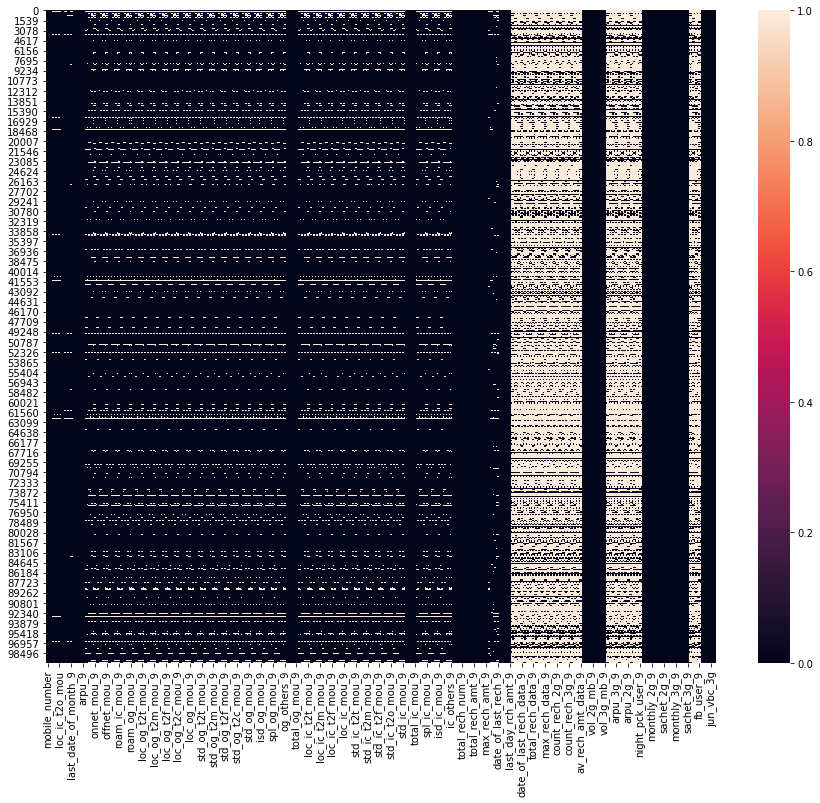

,count,percent
count_rech_2g_6,74846,74.85
max_rech_data_6,74846,74.85
arpu_3g_6,74846,74.85
av_rech_amt_data_6,74846,74.85
count_rech_3g_6,74846,74.85
...,...,...
last_date_of_month_8,1100,1.10
std_og_t2o_mou,1018,1.02
loc_ic_t2o_mou,1018,1.02
loc_og_t2o_mou,1018,1.02


In [9]:
#Checking Null values
null_check(df, heatmap=True)

#### Observations:
1. We have 166 columns with missing values
2. Most of the rows have missing values in the same rows (as observed in the heatmap)
3. We can observe that some columns such as `count_rech_2g_` show __NULL__ values which could mean that _NO recharge was done_. Imputing with __`0`__ would make more sense in such columns.

Hence, before dropping we will try to impute some columns.

## Data Cleaning

In [10]:
#Creating a copy of the original dataset
df_original = df.copy()

In [11]:
#Dropping ID columns
df.drop(['mobile_number'], axis=1, inplace=True)

#Dropping columns which have just 1 category
df.drop(cols_1_category, axis=1, inplace=True)

#Checking the shape after dropping
df.shape

(99999, 223)

In [12]:
#Columns where we can impute '0' instead of leaving it as blank (since NO recharge would mean 0)
recharge_data_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]
#Imputing with 0
df[recharge_data_cols] = df[recharge_data_cols].fillna(0)

In [13]:
#Checking if the above rows have been succesfully imputed
null_check(df)

,count,percent
date_of_last_rech_data_6,74846,74.85
arpu_2g_6,74846,74.85
fb_user_6,74846,74.85
arpu_3g_6,74846,74.85
night_pck_user_6,74846,74.85
...,...,...
last_date_of_month_8,1100,1.10
std_og_t2o_mou,1018,1.02
loc_ic_t2o_mou,1018,1.02
loc_og_t2o_mou,1018,1.02


#### Observation:
- A drop of rows from `166`(originally) to `154` can be observed in the __null_check__ function. This means the columns above have been imputed.

In [14]:
#List of all the columns with date
date_cols = df.columns[df.columns.str.contains('date')].tolist()

#Dropping all 'date' columns
df.drop(date_cols, axis=1, inplace=True)

#Checking the shape after dropping
df.shape

(99999, 212)

In [15]:
null_check(df).head(30)

,count,percent
arpu_2g_6,74846,74.85
fb_user_6,74846,74.85
arpu_3g_6,74846,74.85
night_pck_user_6,74846,74.85
night_pck_user_7,74428,74.43
fb_user_7,74428,74.43
arpu_2g_7,74428,74.43
arpu_3g_7,74428,74.43
arpu_3g_9,74077,74.08
arpu_2g_9,74077,74.08


#### Observations:
- We have mostly similar columns with missing values > 70%
- We will drop these columns before proceeding ahead.

In [16]:
#Creating a lsit of columns with >70% missing values
cols_2_drop = null_check(df)[null_check(df)['percent']>70].index.tolist()

#Dropping columns with > 70% missing values
df.drop(cols_2_drop, axis=1, inplace=True)

#Shape of the dataset after dropping
df.shape

(99999, 196)

In [17]:
null_check(df)

,count,percent
ic_others_9,7745,7.75
std_og_t2m_mou_9,7745,7.75
loc_og_t2m_mou_9,7745,7.75
std_ic_t2f_mou_9,7745,7.75
loc_og_t2f_mou_9,7745,7.75
...,...,...
loc_og_mou_7,3859,3.86
loc_ic_t2t_mou_7,3859,3.86
std_og_t2o_mou,1018,1.02
loc_ic_t2o_mou,1018,1.02


In [18]:
null_check(df)

,count,percent
ic_others_9,7745,7.75
std_og_t2m_mou_9,7745,7.75
loc_og_t2m_mou_9,7745,7.75
std_ic_t2f_mou_9,7745,7.75
loc_og_t2f_mou_9,7745,7.75
...,...,...
loc_og_mou_7,3859,3.86
loc_ic_t2t_mou_7,3859,3.86
std_og_t2o_mou,1018,1.02
loc_ic_t2o_mou,1018,1.02


In [19]:
#Checking the categories in categorical columns | Assuming categorical columns have < 25 categories
for i in df.columns:
    if df[i].nunique() < 25:
        print(i+' (%)')
        print('`'*50)
        print(round(df[i].value_counts(normalize=True, dropna=False),4)*100)
        print()

loc_og_t2o_mou (%)
``````````````````````````````````````````````````
0.0    98.98
NaN     1.02
Name: loc_og_t2o_mou, dtype: float64

std_og_t2o_mou (%)
``````````````````````````````````````````````````
0.0    98.98
NaN     1.02
Name: std_og_t2o_mou, dtype: float64

loc_ic_t2o_mou (%)
``````````````````````````````````````````````````
0.0    98.98
NaN     1.02
Name: loc_ic_t2o_mou, dtype: float64

std_og_t2c_mou_6 (%)
``````````````````````````````````````````````````
0.0    96.06
NaN     3.94
Name: std_og_t2c_mou_6, dtype: float64

std_og_t2c_mou_7 (%)
``````````````````````````````````````````````````
0.0    96.14
NaN     3.86
Name: std_og_t2c_mou_7, dtype: float64

std_og_t2c_mou_8 (%)
``````````````````````````````````````````````````
0.0    94.62
NaN     5.38
Name: std_og_t2c_mou_8, dtype: float64

std_og_t2c_mou_9 (%)
``````````````````````````````````````````````````
0.0    92.25
NaN     7.75
Name: std_og_t2c_mou_9, dtype: float64

std_ic_t2o_mou_6 (%)
`````````````````````````

#### Observations:
- Columns which have a single value in the whole columns:
    - `loc_og_t2o_mou_`
    - `std_og_t2o_mou_`
    - `loc_ic_t2o_mou_`
    - These columns will be dropped since they provide us with no valuable information.

- Columns starting with the below have `0` as the majority value (>93%) and the rest are _NULL values_:
    - `std_og_t2c_mou_`
    - `std_ic_t2o_mou_`
    - These columns can as well be dropped since imputing them with the central tendency will also be futile.

In [20]:
#Checking the categories in categorical columns | Assuming categorical columns have < 25 categories
temp = []
for i in df.columns:
    if df[i].nunique() < 25:
        temp.append(i)

In [21]:
print(temp)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9']


In [22]:
#Applying the above
df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
         'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'], axis=1, inplace=True)

#Checking the shape after dropping
df.shape

(99999, 185)

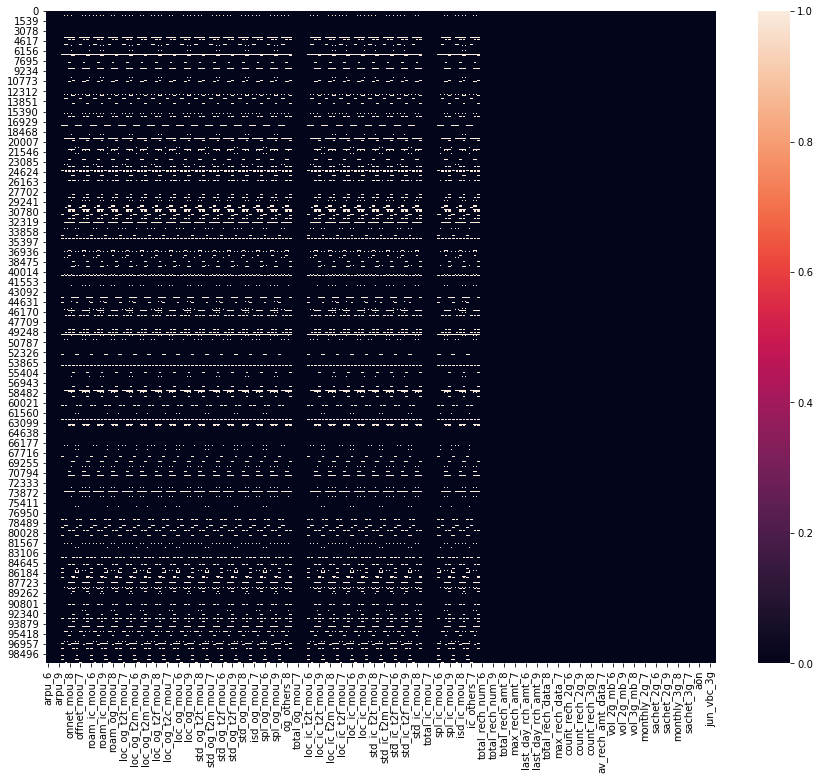

,count,percent
ic_others_9,7745,7.75
std_ic_t2m_mou_9,7745,7.75
loc_ic_t2t_mou_9,7745,7.75
loc_og_t2f_mou_9,7745,7.75
loc_ic_t2m_mou_9,7745,7.75
...,...,...
onnet_mou_7,3859,3.86
loc_og_t2m_mou_7,3859,3.86
loc_ic_mou_7,3859,3.86
loc_ic_t2m_mou_7,3859,3.86


In [23]:
#Checking null_values
null_check(df, heatmap=True)

In [24]:
#Checking number of rows with >50% missing data
sum(df.isnull().sum(axis=1) > df.shape[1]*0.5)

1018

In [25]:
#Dropping rows with >50% missing data
df.drop(df.loc[df.isnull().sum(axis=1) > df.shape[1]*0.5].index, inplace=True)

#Shape of the dataset after dropping
df.shape

(98981, 185)

In [26]:
#Checking if there are any categorical values in the columns with missing fields
df[null_check(df).index].head()

,ic_others_9,std_ic_t2m_mou_9,loc_ic_t2t_mou_9,loc_og_t2f_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,loc_og_t2m_mou_9,loc_ic_t2f_mou_9,std_og_t2m_mou_9,loc_ic_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,loc_og_mou_9,og_others_9,roam_og_mou_9,isd_og_mou_9,std_ic_t2f_mou_9,roam_ic_mou_9,std_og_mou_9,std_ic_mou_9,offnet_mou_9,spl_ic_mou_9,std_og_t2t_mou_9,isd_ic_mou_9,onnet_mou_9,std_og_t2f_mou_9,loc_og_t2c_mou_9,spl_og_mou_8,std_og_mou_8,og_others_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,std_og_t2f_mou_8,isd_og_mou_8,std_og_t2m_mou_8,loc_og_mou_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,std_ic_t2t_mou_6,std_ic_t2f_mou_6,std_og_t2f_mou_6,loc_ic_mou_6,loc_og_t2m_mou_6,std_ic_t2m_mou_6,loc_og_t2t_mou_6,std_og_mou_6,roam_og_mou_6,loc_ic_t2f_mou_6,std_ic_mou_6,std_og_t2m_mou_6,spl_ic_mou_6,roam_ic_mou_6,isd_ic_mou_6,offnet_mou_6,ic_others_6,loc_og_t2f_mou_6,onnet_mou_6,loc_og_mou_6,isd_og_mou_6,og_others_6,loc_ic_t2m_mou_6,std_og_t2t_mou_6,loc_og_t2c_mou_6,spl_og_mou_6,loc_ic_t2t_mou_6,roam_ic_mou_7,loc_og_mou_7,spl_ic_mou_7,loc_ic_t2f_mou_7,std_og_t2m_mou_7,spl_og_mou_7,std_ic_mou_7,offnet_mou_7,ic_others_7,std_og_t2f_mou_7,isd_ic_mou_7,roam_og_mou_7,og_others_7,loc_og_t2f_mou_7,std_ic_t2f_mou_7,std_og_t2t_mou_7,loc_ic_t2t_mou_7,std_ic_t2m_mou_7,loc_og_t2c_mou_7,loc_og_t2t_mou_7,std_og_mou_7,std_ic_t2t_mou_7,onnet_mou_7,loc_og_t2m_mou_7,loc_ic_mou_7,loc_ic_t2m_mou_7,isd_og_mou_7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,5.44,0.16,4.13,1.15,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,15.01,116.09,0.00,56.93,0.00,53.76,0.00,0.00,173.03,18.34,0.00,72.11,0.0,0.00,0.0,0.00,0.00,0.00,15.01,53.76,0.00,0.00,0.00,18.34,0.0,0.00,12.76,0.13,0.0,408.43,29.23,375.58,3.61,2.35,12.49,0.00,14.84,0.0,0.0,0.0,0.00,0.0,0.13,299.54,7.68,304.76,0.00,0.00,7.68,0.00,0.00,291.86,0.00,0.00,0.00,0.00,19.09,11.51,5.90,23.88,0.23,0.0,0.00,5.90,0.00,0.00,0.0,1.83,15.74,0.00,0.00,24.11,35.39,0.0,0.00,17.48,0.23,0.0,4.68,1.61,0.00,150.51,0.0,8.93,0.46,23.43,0.00,99.84,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4.11,29.91,0.00,2.91,74.56,4.58,0.00,78.68,75.94,104.23,65.38,0.0
2,0.36,118.18,148.23,22.24,38.98,42.08,28.16,158.19,9.28,345.41,14.39,49.44,64.81,0.0,70.94,0.0,3.86,38.49,18.04,171.49,118.91,0.45,8.76,0.01,74.81,0.0,0.48,96.84,120.94,0.0,155.99,67.46,38.89,49.63,28.69,167.09,43.23,239.03,0.0,0.0,0.0,22.83,0.0,75.53,67.66,37.26,208.36,0.00,0.00,13.58,15.61,45.76,38.46,22.58,72.41,21.73,1.48,229.56,29.34,45.18,7.19,47.64,0.0,99.48,139.33,41.81,0.21,0.0,0.00,143.33,0.93,24.11,11.54,60.66,0.0,0.45,14.38,4.34,0.0,46.56,115.69,0.00,67.41,0.0,122.29,67.41,236.84,306.66,220.59,3.14,14.76,0.85,0.00,0.0,21.79,58.34,26.49,71.11,177.01,135.54,28.74,108.68,71.29,55.24,16.86,208.86,15.44,0.0
3,0.80,13.98,41.73,2.06,52.86,43.29,65.46,65.59,9.99,160.19,15.49,129.84,83.03,0.0,0.00,0.0,0.00,0.00,236.21,143.83,113.54,0.55,226.21,0.00,241.71,0.0,0.00,18.09,296.11,0.0,48.18,8.04,20.28,19.84,0.00,4.94,0.00,4.94,0.0,0.0,0.0,0.00,0.0,6.53,37.99,310.98,71.68,44.38,39.04,10.61,4.91,0.00,22.46,289.58,43.48,1.18,0.00,233.48,107.43,1.33,73.68,29.23,0.0,57.43,45.99,2.99,0.59,0.0,0.00,123.31,0.00,1.91,99.91,183.03,0.0,0.00,113.96,26.23,0.0,10.96,62.08,54.86,118.68,0.0,27.09,1.73,0.00,105.01,109.01,0.00,0.00,0.00,28.09,0.0,0.65,0.00,14.89,19.98,38.56,0.00,34.81,16.63,66.44,54.39,83.21,111.59,64.51,0.0
4,0.00,0.00,154.56,1.93,48.24,5.98,37.89,0.00,0.00,202.81,58.78,2.31,98.61,0.0,0.00,0.0,0.00,0.00,0.00,2.31,45.81,0.18,0.00,0.00,58.78,0.

In [27]:
df[null_check(df).index].describe()

,ic_others_9,std_ic_t2m_mou_9,loc_ic_t2t_mou_9,loc_og_t2f_mou_9,loc_ic_t2m_mou_9,spl_og_mou_9,loc_og_t2m_mou_9,loc_ic_t2f_mou_9,std_og_t2m_mou_9,loc_ic_mou_9,loc_og_t2t_mou_9,std_ic_t2t_mou_9,loc_og_mou_9,og_others_9,roam_og_mou_9,isd_og_mou_9,std_ic_t2f_mou_9,roam_ic_mou_9,std_og_mou_9,std_ic_mou_9,offnet_mou_9,spl_ic_mou_9,std_og_t2t_mou_9,isd_ic_mou_9,onnet_mou_9,std_og_t2f_mou_9,loc_og_t2c_mou_9,spl_og_mou_8,std_og_mou_8,og_others_8,loc_ic_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,std_og_t2f_mou_8,isd_og_mou_8,std_og_t2m_mou_8,loc_og_mou_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,std_ic_t2t_mou_6,std_ic_t2f_mou_6,std_og_t2f_mou_6,loc_ic_mou_6,loc_og_t2m_mou_6,std_ic_t2m_mou_6,loc_og_t2t_mou_6,std_og_mou_6,roam_og_mou_6,loc_ic_t2f_mou_6,std_ic_mou_6,std_og_t2m_mou_6,spl_ic_mou_6,roam_ic_mou_6,isd_ic_mou_6,offnet_mou_6,ic_others_6,loc_og_t2f_mou_6,onnet_mou_6,loc_og_mou_6,isd_og_mou_6,og_others_6,loc_ic_t2m_mou_6,std_og_t2t_mou_6,loc_og_t2c_mou_6,spl_og_mou_6,loc_ic_t2t_mou_6,roam_ic_mou_7,loc_og_mou_7,spl_ic_mou_7,loc_ic_t2f_mou_7,std_og_t2m_mou_7,spl_og_mou_7,std_ic_mou_7,offnet_mou_7,ic_others_7,std_og_t2f_mou_7,isd_ic_mou_7,roam_og_mou_7,og_others_7,loc_og_t2f_mou_7,std_ic_t2f_mou_7,std_og_t2t_mou_7,loc_ic_t2t_mou_7,std_ic_t2m_mou_7,loc_og_t2c_mou_7,loc_og_t2t_mou_7,std_og_mou_7,std_ic_t2t_mou_7,onnet_mou_7,loc_og_t2m_mou_7,loc_ic_mou_7,loc_ic_t2m_mou_7,isd_og_mou_7
count,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,92254.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,94621.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96062.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000,96140.000000
mean,1.017162,19.620913,46.281794,3.655123,106.155471,4.412767,90.463192,12.173105,86.276622,164.619293,44.584446,9.432479,138.709970,0.047456,8.555519,0.723892,2.173419,6.343841,169.664466,31.229344,190.337222,0.163137,82.342919,8.063003,130.302327,1.042362,1.232726,5.053769,174.191498,0.033372,167.432575,47.211362,108.460515,11.751834,9.883921,21.183211,2.085004,33.154735,0.040361,8.442001,0.970800,1.067792,0.791247,89.838390,141.328209,133.018098,196.574803,7.292981,9.971890,45.887806,3.677991,1.433821,91.755128,83.282673,9.575993,2.156397,1.129011,167.491059,93.342088,20.722240,47.100763,168.261218,13.911337,12.084305,32.457179,87.299624,0.061557,9.950013,7.460608,197.935577,0.854656,3.751013,132.395875,144.201175,0.798277,0.454157,107.475650,79.829870,1.123056,3.916811,47.922365,7.149898,141.670476,0.033585,12.599697,90.804137,4.978279,33.887833,197.045133,1.012960,1.115010,8.334936,9.818732,0.030235,3.792985,2.216923,83.299598,47.990520,21.656415,1.368500,46.47

#### Observations:
- From the above, almost all columns seem to have statistical outliers. 
    - It would be better to impute them with their median values if they are relevant.
    - We will drop them if they seem to be outliers
- There seem to be no categorical columns in the list of missing value columns.

In [28]:
#Imputing missing values with their median
for i in null_check(df).index:
    df[i] = df[i].fillna(df[i].median())

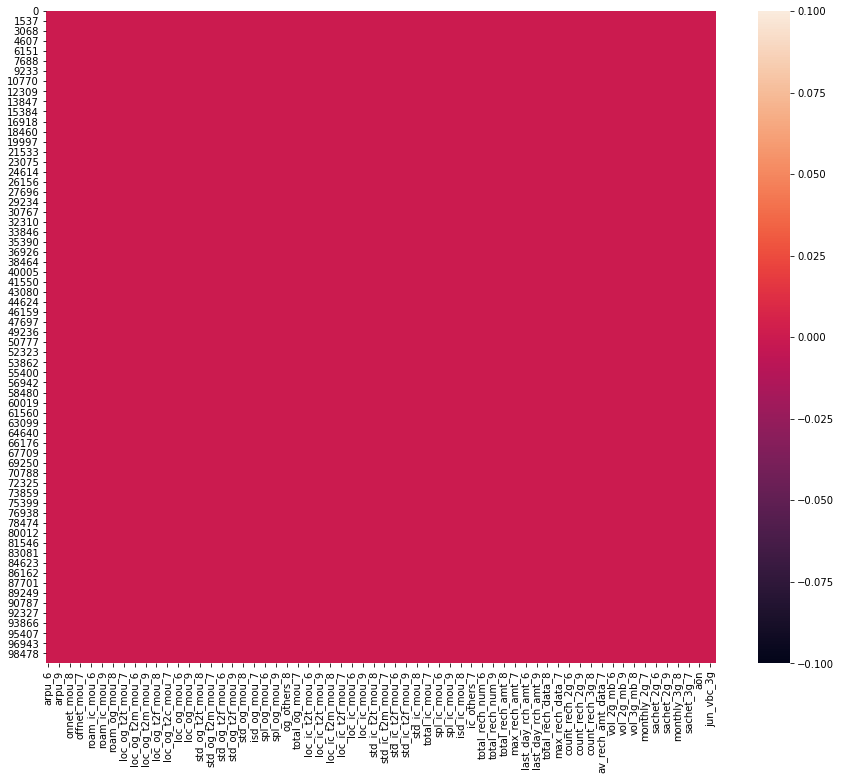

,count,percent


In [29]:
null_check(df, heatmap=True)

## Filter High-Value Customers

- To filter High-Value customers, we will consider only the good months to get a better understanding.
- We will take average of the `total_rech_amount_` columns for all rows to get avg recharge done by each customer.

In [30]:
#Creating avg rech column
df['avg_rech'] = df[['total_rech_amt_6','total_rech_amt_7']].sum(axis=1)/2

In [31]:
df[['avg_rech','total_rech_amt_6','total_rech_amt_7']].mean()

avg_rech            326.999465
total_rech_amt_6    328.954941
total_rech_amt_7    325.043988
dtype: float64

Seem like the averaging is done well.

Now, we will filter out the __High Value customers__ by taking the `70th percentile` value as the threshold.

In [32]:
#70th percentile value
df['avg_rech'].quantile(0.7)

370.0

In [33]:
#Filtering the high value customers
df = df[df['avg_rech']>=df['avg_rech'].quantile(0.7)]

In [34]:
#Final remaining rows
df.shape

(29793, 186)

## Derive Churn

Since the `Churn` variable isn't available, we will create it with the __Data of September Month__

Conditions to label as __`Churn`__:
- Total incoming = 0
- Total outgoing = 0
- Total 2G = 0
- Total 3G = 0


After deriving the above, we will drop all the september month's data.

In [35]:
#Creating a churn variable with above logic
df['churn'] = np.where((df['total_og_mou_9'] + df['total_ic_mou_9'] + df['vol_2g_mb_9'] + df['vol_3g_mb_9'])==0, 1, 0)

,count,percent
0,27257,91.49
1,2536,8.51


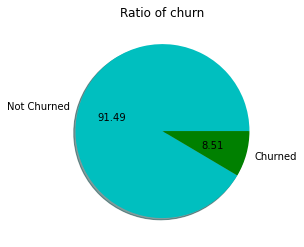

In [36]:
#Churning ratio
plt.pie(df['churn'].value_counts(), colors=['c','g'], autopct='%.2f', labels=['Not Churned','Churned'], shadow=True)
plt.title('Ratio of churn')
pd.DataFrame({'count':df['churn'].value_counts(),'percent':df['churn'].value_counts(normalize=True).round(4)*100})

Clearly, the target variable is extremely imbalanced. As of August, the churn rate is __8.5%__.

We will apply some dataset balancing techniques before modelling.

In [37]:
#Dropping all the september variables
df.drop(df.columns[df.columns.str.contains('9')], axis=1, inplace=True)
df.drop('sep_vbc_3g', axis=1, inplace=True)

#Shape after dropping
df.shape

(29793, 141)

## Feature Engineering

Below features can be derived out of the data:
1. Identification of whether a customer uses `Internet heavily`:
    - If customer has recharged 0 times > __Non-internet user__
    - If customer has recharged 1 or 2 times > __Avg internet user__
    - If customer has recharged 3 times > __Regular internet user__
    - If customer has recharged >3 times > __Heavy internet user__


__PS:__ _Above measures are taken as an average of all the months data available in the final dataset_
    
2. `AON` to bins:
    - If customer is older than 4 years (>= 1460 days) > __Long term Customer__
    - If customer is between 1.5 to 4 years (>= 547 days & < 1460 days) > __Short term customer__
    - If customer is below 1.5 years (< 547 days) > __Recent Customer__
    
    
3. Promotion(s) awareness to the user (with the help of `vbc` columns):
    - __1__ if aware
    - __0__ if not
    
__PS:__ _Above measures are taken as an average of all the months data available in the final dataset_

In [38]:
#Function to create internet_user_level column
def int_hev(x):
    if x==0:
        return 'non_user'
    elif x>0 and x<=2:
        return 'avg_user'
    elif x==3:
        return 'regular_user'
    else:
        return 'heavy_user'


#Creating internet_user_level column
df['internet_user_level'] = df[['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']].sum(axis=1).apply(int_hev)

#Checking the above
df['internet_user_level'].value_counts()

non_user        14265
heavy_user       8102
avg_user         4890
regular_user     2536
Name: internet_user_level, dtype: int64

In [39]:
#Creating binned 'aon' column
df['customer_term'] = pd.cut(df['aon'], bins=[0,546,1460,99999], labels=['recent','short_term','long_term'])

#Checking the above
df['customer_term'].value_counts()

short_term    10692
long_term      9760
recent         9341
Name: customer_term, dtype: int64

In [40]:
#Creating column indicating customers promotional usage
df['customer_promotional_usage'] = df[['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']].sum(axis=1).apply(lambda x: 0 if x==0 else 1)

#Checking the above
df['customer_promotional_usage'].value_counts()

0    20464
1     9329
Name: customer_promotional_usage, dtype: int64

## Univariate Analysis

In [41]:
df.describe(percentiles=[0.95,0.97,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech,churn,customer_promotional_usage
count,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.00000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.00000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000,29793.000000
mean,588.079518,590.676232,536.555768,298.003964,306.264358,269.971874,4

On a high level it is very visibly evident that the values at more than 99th percentile are extremely high.

Dropping these values is crucial. Hence, this step will be taken.

In [42]:
#Function for categorical columns
def uni_cat(col, df, rot=0):
    #Value counts of categories 
    print(f'Counts of {col}')
    print('-'*25)
    print(pd.DataFrame({'#':df[col].value_counts(dropna=False), '%':round(df[col].value_counts(normalize=True, dropna=False)*100,2)}))
    
    #Countplots
    plt.figure(figsize=(15,4))
    sns.countplot(df[col])
    plt.title(f'Counts in {col}')
    plt.xticks(rotation=rot)
    plt.show()

#Function for numerical columns
def uni_num(col, df, new_percentiles=[]):
    #Null values
    if df[col].isnull().sum()>0:
        print(f'Null values in {col}: {df[col].isnull().sum()}')
    
    #Description of column
    print(f'Desription of {col}')
    print('-'*25)
    percentiles=[0.1,0.25,0.5,0.75,0.9]
    percentiles.extend(new_percentiles)
    print(df[col].describe(percentiles=percentiles))
    
    #Subplots
    fig,axes=plt.subplots(1,2, figsize=(15,4))
    
    #Distribution plot
    sns.distplot(df[col], ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    
    #Boxplot
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    
    plt.show()

Desription of arpu_6
-------------------------
count    29793.000000
mean       588.079518
std        442.841151
min      -2258.709000
1%          19.153280
5%         203.336000
10%        271.317800
25%        364.761000
50%        496.519000
75%        704.797000
90%        994.663200
95%       1240.465400
97%       1459.879680
99%       1983.316400
max      27731.088000
Name: arpu_6, dtype: float64


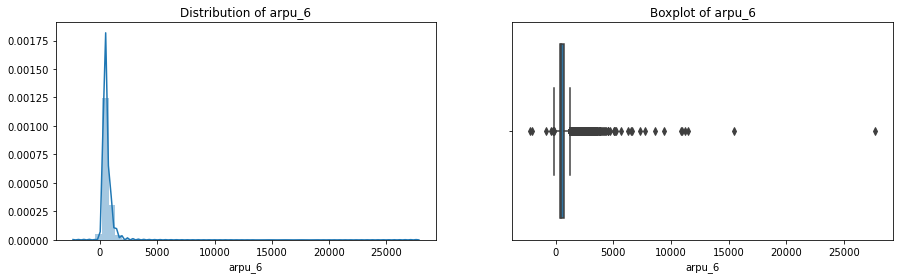

Desription of arpu_7
-------------------------
count    29793.000000
mean       590.676232
std        463.606810
min      -2014.045000
1%          32.305360
5%         213.805600
10%        275.578800
25%        366.321000
50%        495.003000
75%        702.254000
90%        996.986000
95%       1263.520000
97%       1473.220240
99%       1999.567280
max      35145.834000
Name: arpu_7, dtype: float64


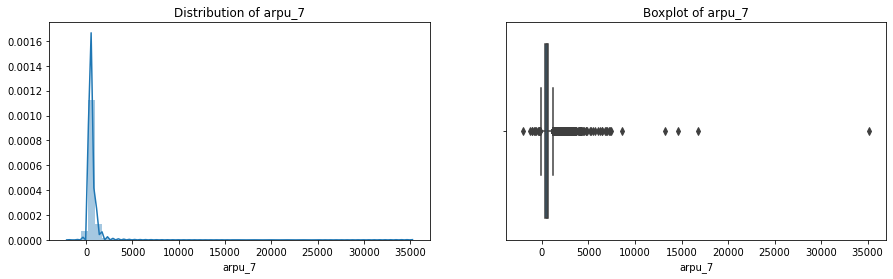

Desription of arpu_8
-------------------------
count    29793.000000
mean       536.555768
std        493.139632
min       -945.808000
1%           0.000000
5%          24.338000
10%        136.437600
25%        291.537000
50%        453.616000
75%        672.678000
90%        987.174600
95%       1261.584400
97%       1479.967160
99%       1989.248920
max      33543.624000
Name: arpu_8, dtype: float64


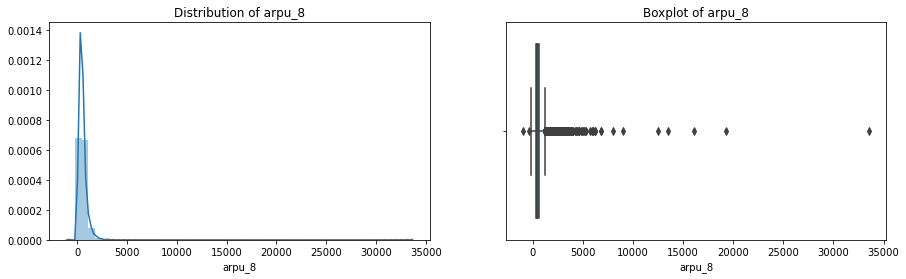

In [43]:
for i in ['arpu_6','arpu_7','arpu_8']:
    uni_num(i, df, new_percentiles=[0.01,0.05,0.95,0.97,0.99])

#### Outlier Treatment

In [44]:
#arpu_6
df = df[(df['arpu_6']<=df['arpu_6'].quantile(0.995)) & (df['arpu_6']>=df['arpu_6'].quantile(0.01))]
df = df[(df['arpu_7']<=df['arpu_7'].quantile(0.995)) & (df['arpu_7']>=df['arpu_7'].quantile(0.01))]
df = df[(df['arpu_8']<=df['arpu_8'].quantile(0.995)) & (df['arpu_8']>=df['arpu_8'].quantile(0.01))]

Desription of arpu_6
-------------------------
count    28701.000000
mean       567.146527
std        307.342157
min         19.180000
10%        278.426000
25%        366.054000
50%        492.876000
75%        689.482000
90%        958.079000
max       2403.107000
Name: arpu_6, dtype: float64


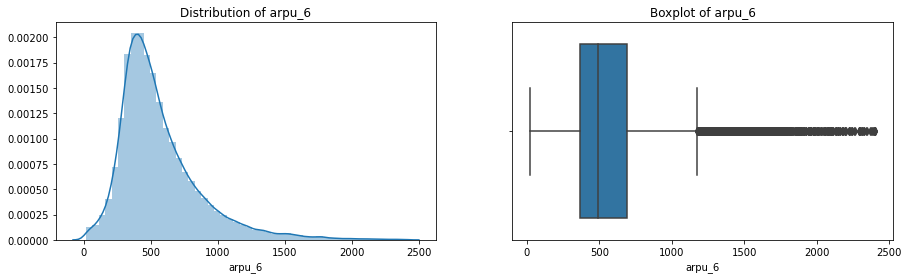

Desription of arpu_7
-------------------------
count    28701.000000
mean       567.815165
std        301.903714
min         32.480000
10%        282.899000
25%        367.785000
50%        491.590000
75%        688.818000
90%        955.746000
max       2123.266000
Name: arpu_7, dtype: float64


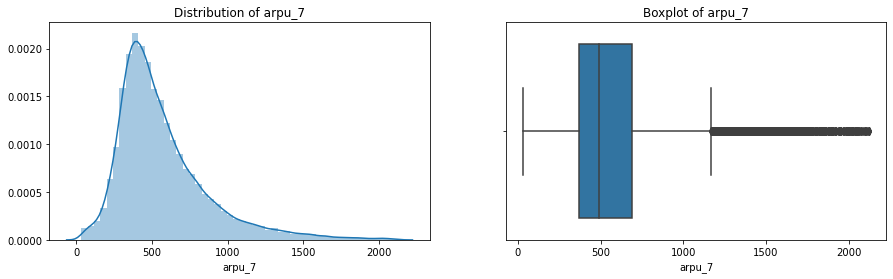

Desription of arpu_8
-------------------------
count    28701.000000
mean       511.580718
std        334.236745
min          0.000000
10%        149.921000
25%        294.439000
50%        451.349000
75%        660.906000
90%        939.790000
max       2028.390000
Name: arpu_8, dtype: float64


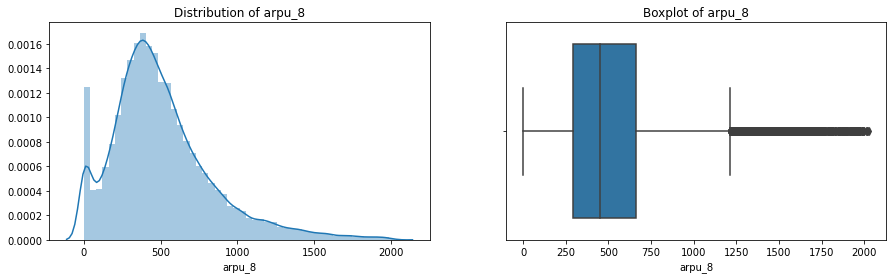

In [45]:
for i in ['arpu_6','arpu_7','arpu_8']:
    uni_num(i, df)

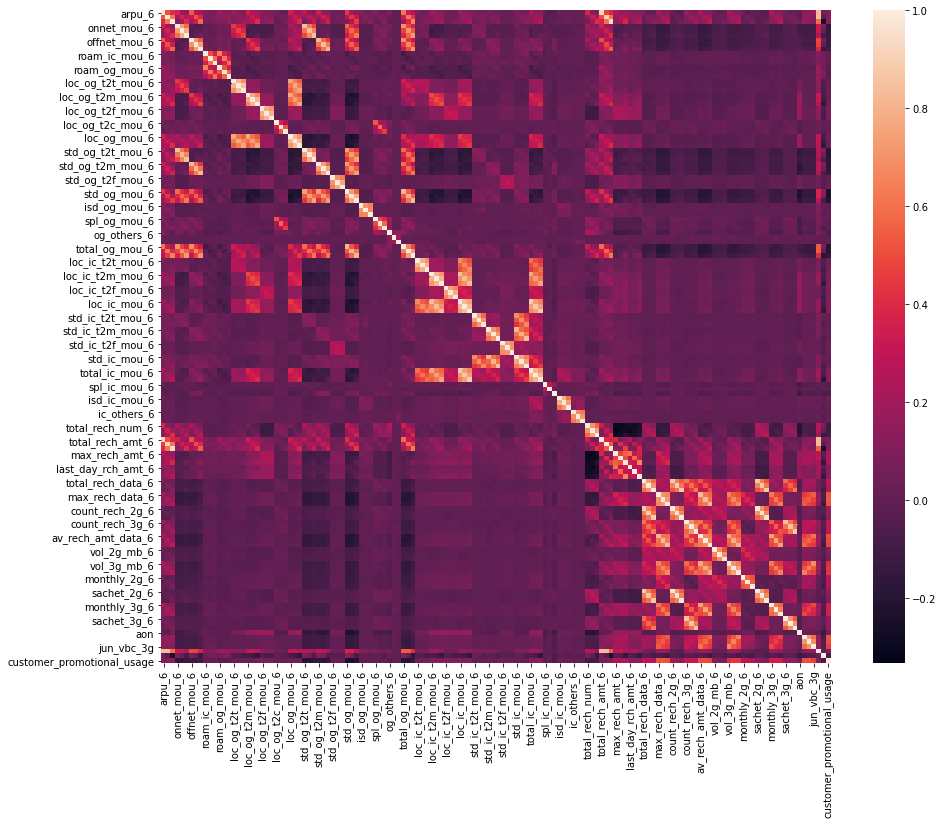

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr())

From the above, __correlation__ among independent variables can be observed by the _Extremely light_ or _Extremely dark_ colors.

- Linear Models might not work well directly.

In [49]:
df.churn.value_counts()

0    26485
1     2216
Name: churn, dtype: int64

In [74]:
%matplotlib inline
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [75]:
sns.set_style("darkgrid")

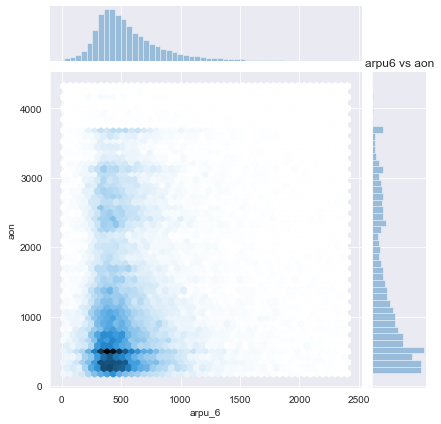

In [82]:
sns.jointplot(data=df, x='arpu_6',y='aon',kind='hex')
plt.title("arpu6 vs aon")
plt.show()

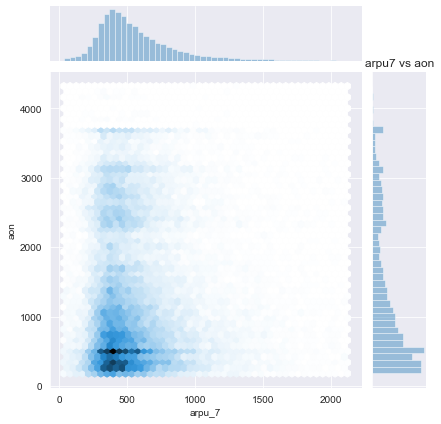

In [77]:
sns.jointplot(data=df, x='arpu_7',y='aon',kind='hex')
plt.title("arpu7 vs aon")
plt.show()

- We see an almost similar normal distribution of arpu_6 and arpu_7 and similar correlation with aon

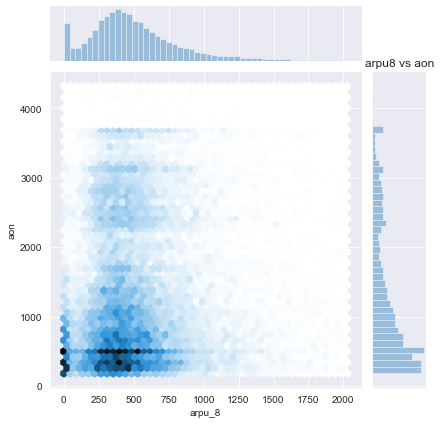

In [78]:
sns.jointplot(data=df, x='arpu_8',y='aon',kind='hex')
plt.title("arpu8 vs aon")
plt.show()

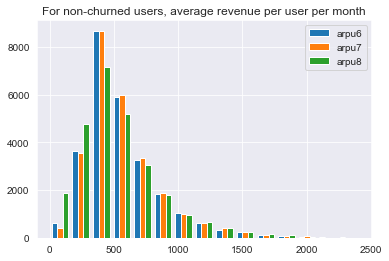

In [79]:
plt.hist([df[df.churn==0].arpu_6,df[df.churn==0].arpu_7,df[df.churn==0].arpu_8],bins=15,label=['arpu6','arpu7','arpu8'])
plt.legend()
plt.title("For non-churned users, average revenue per user per month")
plt.show()

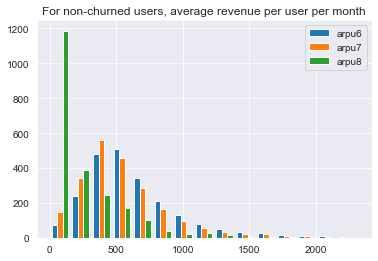

In [80]:
plt.hist([df[df.churn==1].arpu_6,df[df.churn==1].arpu_7,df[df.churn==1].arpu_8],bins=15,label=['arpu6','arpu7','arpu8'])
plt.legend()
plt.title("For non-churned users, average revenue per user per month")
plt.show()

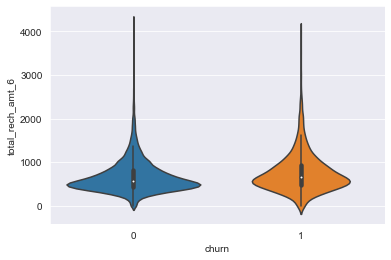

In [84]:
sns.violinplot(data=df,x='churn',y='total_rech_amt_6');

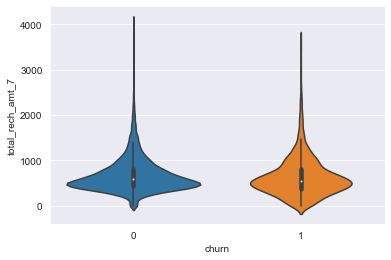

In [85]:
sns.violinplot(data=df,x='churn',y='total_rech_amt_7');

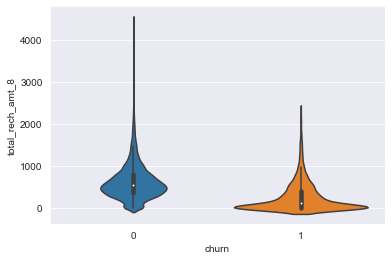

In [86]:
sns.violinplot(data=df,x='churn',y='total_rech_amt_8');

- We can observer that for people who churned their recharge amount decreased from 6th to 7th month and decreased significantly in 8th month.
- This indicated that people who are going to churn have decreased their recharge amount and can indicate churn in other months too

### Creating Dummy variables

 categorical variables are :'customer_term', 'internet_user_level'

In [ ]:
#Creating a function to dummy the columns
def to_dummy(df,col):      
    status = pd.get_dummies(df[col],drop_first = True)
    churn_data = pd.concat([df, status], axis = 1)
    churn_data.drop([col], axis = 1, inplace = True)
    return churn_data

Get the categorical columns

In [ ]:
#dummying the columns
df = to_dummy(df,'customer_term')
df = to_dummy(df,'internet_user_level')

In [ ]:
#Splitting the data
X=df.drop('churn', axis=1)
y=df['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [ ]:
#Scaling the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [ ]:
#Handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=11)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

print(X_train_smote.shape)
pd.Series(y_train_smote).value_counts(normalize = True)

(42374, 146)


1    0.5
0    0.5
Name: churn, dtype: float64

In [ ]:
#Storing a copy (in case further modifications are done)
XT_copy = X_train_smote.copy()
yt_copy = y_train_smote.copy()

### Model for business interpretation

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

#Function for checking VIF
def vif_check(X_train):
    vif = pd.DataFrame()
    vif['VIF'] = [VIF(X_train.values,i) for i in range(len(X_train.columns))]
    vif['features'] = X_train.columns

    return vif.sort_values('VIF', ascending=False).reset_index(drop=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Fitting LogisticRegression model in RFE to extract top 25 features
model = LogisticRegression()
rfe = RFE(model, 25)
rfe.fit(X_train, y_train)

#RFE columns - support and ranking
rfe_checks = pd.DataFrame({'Features':X_train.columns, 'Support':rfe.support_, 'Rank':rfe.ranking_}).sort_values(by='Rank')
rfe_checks.head()

,Features,Support,Rank
14,roam_og_mou_8,True,1
32,std_og_t2t_mou_8,True,1
53,total_og_mou_8,True,1
33,std_og_t2m_mou_6,True,1
135,aon,True,1


In [ ]:
import statsmodels.api as sm

#Adding constant to the data for statsmodels library
X_train_sm = sm.add_constant(X_train_smote[X_train_smote.columns[rfe.support_]])

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42348
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:54:36   Pearson chi2:                 1.23e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8558      0.067    -27.848      0.000      -1.986      -1.725
arpu_7                 0.5498      0.020     27.500      0.000       0.511       0.589
onnet_mou_8            8.8356      1.241      7.122      0.000       6.404      11.267
offnet_mou_6           0.2842      0.086      3.291      0.001       0.115       0.453
offnet_mou_8           6.9788      1.163      6.001      0.000       4.699       9.258
roam_og_mou_8         -1.4209      0.245     -5.792      0.000      -1.902      -0.940
loc_og_t2m_mou_6      -0.1780      0.053     -3.380      0.001      -0.281      -0.075
loc_og_t2m_mou_8       0.3610      0.140      2.578      0.010       0.087       0.635
loc_og_mou_8          -0.2222      0.419     -0.530      0.596      -1.044       0.600
std_og_t2t_mou_8      -1.2352      0.211     -5.847      0.000      -1.649      -0.821
std_og_t2m_mou_6      -0.1243      0.077     -1.611      0.107      -0.275       0.027
std_og_mou_8           1.7385      0.568      3.063      0.002       0.626       2.851
og_others_8           -7.0515      3.334     -2.115      0.034     -13.585      -0.518
total_og_mou_8       -12.9270      1.574     -8.214      0.000     -16.012      -9.843
loc_ic_mou_8           5.0031      1.024      4.887      0.000       2.997       7.010
std_ic_mou_8           2.2950      0.457      5.017      0.000       1.398       3.191
total_ic_mou_7         0.7242      0.039     18.805      0.000       0.649       0.800
total_ic_mou_8        -7.6652      1.190     -6.440      0.000      -9.998      -5.332
spl_ic_mou_8          -0.4613      0.027    -17.255      0.000      -0.514      -0.409
isd_ic_mou_8           1.4183      0.247      5.748      0.000       0.935       1.902
total_rech_num_8      -0.4755      0.022    -21.466      0.000      -0.519      -0.432
last_day_rch_amt_8    -0.6595      0.027    -24.382      0.000      -0.713      -0.606
max_rech_data_8       -0.5086      0.034    -15.049      0.000      -0.575      -0.442
vol_3g_mb_8           -0.2371      0.037     -6.363      0.000      -0.310      -0.164
monthly_2g_8          -0.3170      0.031    -10.090      0.000      -0.379      -0.255
aon                   -0.4118      0.018    -22.616      0.000      -0.448      -0.376
======================================================================================
"""

In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('loc_og_mou_8', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42349
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:55:28   Pearson chi2:                 1.23e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8555      0.066    -27.907      0.000      -1.986      -1.725
arpu_7                 0.5504      0.020     27.565      0.000       0.511       0.590
onnet_mou_8            8.5458      1.116      7.660      0.000       6.359      10.732
offnet_mou_6           0.2837      0.086      3.284      0.001       0.114       0.453
offnet_mou_8           6.7577      1.088      6.211      0.000       4.625       8.890
roam_og_mou_8         -1.3707      0.227     -6.042      0.000      -1.815      -0.926
loc_og_t2m_mou_6      -0.1776      0.053     -3.371      0.001      -0.281      -0.074
loc_og_t2m_mou_8       0.3277      0.125      2.624      0.009       0.083       0.572
std_og_t2t_mou_8      -1.1846      0.188     -6.300      0.000      -1.553      -0.816
std_og_t2m_mou_6      -0.1241      0.077     -1.608      0.108      -0.275       0.027
std_og_mou_8           2.0031      0.275      7.296      0.000       1.465       2.541
og_others_8           -7.0197      3.324     -2.112      0.035     -13.535      -0.504
total_og_mou_8       -12.8956      1.576     -8.181      0.000     -15.985      -9.806
loc_ic_mou_8           5.0890      1.013      5.022      0.000       3.103       7.075
std_ic_mou_8           2.3336      0.453      5.155      0.000       1.446       3.221
total_ic_mou_7         0.7239      0.039     18.801      0.000       0.648       0.799
total_ic_mou_8        -7.7654      1.178     -6.592      0.000     -10.074      -5.457
spl_ic_mou_8          -0.4611      0.027    -17.249      0.000      -0.513      -0.409
isd_ic_mou_8           1.4396      0.244      5.900      0.000       0.961       1.918
total_rech_num_8      -0.4747      0.022    -21.487      0.000      -0.518      -0.431
last_day_rch_amt_8    -0.6590      0.027    -24.383      0.000      -0.712      -0.606
max_rech_data_8       -0.5089      0.034    -15.058      0.000      -0.575      -0.443
vol_3g_mb_8           -0.2372      0.037     -6.364      0.000      -0.310      -0.164
monthly_2g_8          -0.3168      0.031    -10.085      0.000      -0.378      -0.255
aon                   -0.4120      0.018    -22.635      0.000      -0.448      -0.376
======================================================================================
"""

In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('std_og_t2m_mou_6', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42350
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:55:48   Pearson chi2:                 1.22e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8547      0.067    -27.889      0.000      -1.985      -1.724
arpu_7                 0.5524      0.020     27.722      0.000       0.513       0.591
onnet_mou_8            8.5356      1.116      7.649      0.000       6.348      10.723
offnet_mou_6           0.1485      0.019      7.854      0.000       0.111       0.186
offnet_mou_8           6.8083      1.088      6.257      0.000       4.676       8.941
roam_og_mou_8         -1.3686      0.227     -6.031      0.000      -1.813      -0.924
loc_og_t2m_mou_6      -0.1067      0.029     -3.720      0.000      -0.163      -0.051
loc_og_t2m_mou_8       0.2989      0.124      2.420      0.016       0.057       0.541
std_og_t2t_mou_8      -1.1270      0.185     -6.108      0.000      -1.489      -0.765
std_og_mou_8           1.9197      0.270      7.122      0.000       1.391       2.448
og_others_8           -7.0261      3.326     -2.113      0.035     -13.544      -0.508
total_og_mou_8       -12.8830      1.577     -8.170      0.000     -15.974      -9.793
loc_ic_mou_8           5.0998      1.014      5.031      0.000       3.113       7.087
std_ic_mou_8           2.3399      0.453      5.168      0.000       1.452       3.227
total_ic_mou_7         0.7193      0.038     18.748      0.000       0.644       0.794
total_ic_mou_8        -7.7713      1.178     -6.595      0.000     -10.081      -5.462
spl_ic_mou_8          -0.4611      0.027    -17.246      0.000      -0.514      -0.409
isd_ic_mou_8           1.4422      0.244      5.909      0.000       0.964       1.921
total_rech_num_8      -0.4770      0.022    -21.622      0.000      -0.520      -0.434
last_day_rch_amt_8    -0.6579      0.027    -24.350      0.000      -0.711      -0.605
max_rech_data_8       -0.5102      0.034    -15.097      0.000      -0.576      -0.444
vol_3g_mb_8           -0.2368      0.037     -6.355      0.000      -0.310      -0.164
monthly_2g_8          -0.3170      0.031    -10.088      0.000      -0.379      -0.255
aon                   -0.4112      0.018    -22.605      0.000      -0.447      -0.376
======================================================================================
"""

In [ ]:
vif_check(X_train_sm).head()

,VIF,features
0,1494.679210,total_og_mou_8
1,710.634261,offnet_mou_8
2,663.395867,onnet_mou_8
3,637.353767,total_ic_mou_8
4,445.051160,loc_ic_mou_8


In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('total_og_mou_8', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42351
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:57:08   Pearson chi2:                 1.45e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8607      0.068    -27.527      0.000      -1.993      -1.728
arpu_7                 0.5466      0.020     27.499      0.000       0.508       0.586
onnet_mou_8           -0.5640      0.061     -9.208      0.000      -0.684      -0.444
offnet_mou_6           0.1514      0.019      8.027      0.000       0.114       0.188
offnet_mou_8          -1.8968      0.200     -9.475      0.000      -2.289      -1.504
roam_og_mou_8          0.4630      0.031     14.836      0.000       0.402       0.524
loc_og_t2m_mou_6      -0.1052      0.029     -3.677      0.000      -0.161      -0.049
loc_og_t2m_mou_8       0.3321      0.122      2.718      0.007       0.093       0.572
std_og_t2t_mou_8      -1.1775      0.182     -6.453      0.000      -1.535      -0.820
std_og_mou_8           1.9783      0.266      7.427      0.000       1.456       2.500
og_others_8           -7.1306      3.390     -2.104      0.035     -13.774      -0.487
loc_ic_mou_8          12.5906      0.466     27.015      0.000      11.677      13.504
std_ic_mou_8           5.6794      0.210     27.065      0.000       5.268       6.091
total_ic_mou_7         0.7189      0.038     18.739      0.000       0.644       0.794
total_ic_mou_8       -16.4961      0.539    -30.581      0.000     -17.553     -15.439
spl_ic_mou_8          -0.4609      0.027    -17.237      0.000      -0.513      -0.409
isd_ic_mou_8           3.2315      0.114     28.232      0.000       3.007       3.456
total_rech_num_8      -0.5081      0.022    -23.282      0.000      -0.551      -0.465
last_day_rch_amt_8    -0.6603      0.027    -24.498      0.000      -0.713      -0.607
max_rech_data_8       -0.5034      0.034    -14.970      0.000      -0.569      -0.437
vol_3g_mb_8           -0.2355      0.037     -6.354      0.000      -0.308      -0.163
monthly_2g_8          -0.3159      0.031    -10.076      0.000      -0.377      -0.254
aon                   -0.4076      0.018    -22.434      0.000      -0.443      -0.372
======================================================================================
"""

In [ ]:
vif_check(X_train_sm).head()

,VIF,features
0,195.753170,std_og_mou_8
1,128.141436,total_ic_mou_8
2,112.757903,offnet_mou_8
3,93.733620,std_og_t2t_mou_8
4,91.912164,loc_ic_mou_8


In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('std_og_mou_8', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42352
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:57:32   Pearson chi2:                 1.39e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8654      0.069    -26.925      0.000      -2.001      -1.730
arpu_7                 0.5368      0.020     27.129      0.000       0.498       0.576
onnet_mou_8           -0.4719      0.056     -8.386      0.000      -0.582      -0.362
offnet_mou_6           0.1499      0.019      7.920      0.000       0.113       0.187
offnet_mou_8          -0.4239      0.026    -16.343      0.000      -0.475      -0.373
roam_og_mou_8          0.2641      0.014     18.613      0.000       0.236       0.292
loc_og_t2m_mou_6      -0.1070      0.029     -3.729      0.000      -0.163      -0.051
loc_og_t2m_mou_8      -0.5038      0.047    -10.614      0.000      -0.597      -0.411
std_og_t2t_mou_8       0.1191      0.051      2.327      0.020       0.019       0.219
og_others_8           -7.3941      3.485     -2.121      0.034     -14.225      -0.563
loc_ic_mou_8          12.1575      0.464     26.223      0.000      11.249      13.066
std_ic_mou_8           5.4997      0.209     26.316      0.000       5.090       5.909
total_ic_mou_7         0.7279      0.038     18.931      0.000       0.653       0.803
total_ic_mou_8       -16.0394      0.537    -29.855      0.000     -17.092     -14.986
spl_ic_mou_8          -0.4625      0.027    -17.306      0.000      -0.515      -0.410
isd_ic_mou_8           3.1267      0.114     27.433      0.000       2.903       3.350
total_rech_num_8      -0.5055      0.022    -23.253      0.000      -0.548      -0.463
last_day_rch_amt_8    -0.6643      0.027    -24.717      0.000      -0.717      -0.612
max_rech_data_8       -0.5112      0.034    -15.094      0.000      -0.578      -0.445
vol_3g_mb_8           -0.2355      0.037     -6.335      0.000      -0.308      -0.163
monthly_2g_8          -0.3163      0.031    -10.062      0.000      -0.378      -0.255
aon                   -0.4085      0.018    -22.504      0.000      -0.444      -0.373
======================================================================================
"""

In [ ]:
vif_check(X_train_sm).head()

,VIF,features
0,119.530756,total_ic_mou_8
1,85.359369,loc_ic_mou_8
2,16.643436,std_ic_mou_8
3,5.394487,isd_ic_mou_8
4,4.676102,onnet_mou_8


In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('total_ic_mou_8', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42353
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:57:58   Pearson chi2:                 9.00e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9559      0.077    -25.538      0.000      -2.106      -1.806
arpu_7                 0.4848      0.019     25.159      0.000       0.447       0.523
onnet_mou_8           -0.4754      0.055     -8.585      0.000      -0.584      -0.367
offnet_mou_6           0.1792      0.018      9.690      0.000       0.143       0.215
offnet_mou_8          -0.4507      0.026    -17.020      0.000      -0.503      -0.399
roam_og_mou_8          0.2353      0.014     17.066      0.000       0.208       0.262
loc_og_t2m_mou_6      -0.0177      0.026     -0.675      0.500      -0.069       0.034
loc_og_t2m_mou_8      -0.7166      0.048    -14.960      0.000      -0.811      -0.623
std_og_t2t_mou_8       0.0840      0.051      1.657      0.097      -0.015       0.183
og_others_8          -10.4505      3.902     -2.678      0.007     -18.099      -2.802
loc_ic_mou_8          -1.3943      0.054    -25.740      0.000      -1.500      -1.288
std_ic_mou_8          -0.6418      0.037    -17.380      0.000      -0.714      -0.569
total_ic_mou_7         0.5475      0.035     15.449      0.000       0.478       0.617
spl_ic_mou_8          -0.5387      0.028    -19.549      0.000      -0.593      -0.485
isd_ic_mou_8          -0.1852      0.030     -6.226      0.000      -0.243      -0.127
total_rech_num_8      -0.7498      0.023    -33.233      0.000      -0.794      -0.706
last_day_rch_amt_8    -0.8770      0.028    -31.748      0.000      -0.931      -0.823
max_rech_data_8       -0.5382      0.035    -15.431      0.000      -0.607      -0.470
vol_3g_mb_8           -0.2196      0.038     -5.825      0.000      -0.293      -0.146
monthly_2g_8          -0.3606      0.031    -11.477      0.000      -0.422      -0.299
aon                   -0.4449      0.017    -25.936      0.000      -0.479      -0.411
======================================================================================
"""

In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('loc_og_t2m_mou_6', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42354
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:58:19   Pearson chi2:                 1.06e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9570      0.077    -25.560      0.000      -2.107      -1.807
arpu_7                 0.4850      0.019     25.181      0.000       0.447       0.523
onnet_mou_8           -0.4758      0.055     -8.595      0.000      -0.584      -0.367
offnet_mou_6           0.1743      0.017     10.279      0.000       0.141       0.208
offnet_mou_8          -0.4462      0.026    -17.437      0.000      -0.496      -0.396
roam_og_mou_8          0.2351      0.014     17.059      0.000       0.208       0.262
loc_og_t2m_mou_8      -0.7333      0.041    -17.843      0.000      -0.814      -0.653
std_og_t2t_mou_8       0.0847      0.051      1.671      0.095      -0.015       0.184
og_others_8          -10.4398      3.902     -2.676      0.007     -18.087      -2.793
loc_ic_mou_8          -1.3919      0.054    -25.747      0.000      -1.498      -1.286
std_ic_mou_8          -0.6390      0.037    -17.429      0.000      -0.711      -0.567
total_ic_mou_7         0.5430      0.035     15.603      0.000       0.475       0.611
spl_ic_mou_8          -0.5385      0.028    -19.544      0.000      -0.592      -0.484
isd_ic_mou_8          -0.1842      0.030     -6.200      0.000      -0.242      -0.126
total_rech_num_8      -0.7492      0.023    -33.240      0.000      -0.793      -0.705
last_day_rch_amt_8    -0.8771      0.028    -31.748      0.000      -0.931      -0.823
max_rech_data_8       -0.5382      0.035    -15.429      0.000      -0.607      -0.470
vol_3g_mb_8           -0.2197      0.038     -5.828      0.000      -0.294      -0.146
monthly_2g_8          -0.3604      0.031    -11.471      0.000      -0.422      -0.299
aon                   -0.4454      0.017    -25.985      0.000      -0.479      -0.412
======================================================================================
"""

In [ ]:
#Modifying the input dataset
X_train_sm = X_train_sm.drop('std_og_t2t_mou_8', axis=1)

#Building the model
model = sm.GLM(y_train_smote, X_train_sm, family = sm.families.Binomial())
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42374
Model:                            GLM   Df Residuals:                    42355
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 14 Aug 2021   Deviance:                          nan
Time:                        11:58:34   Pearson chi2:                 1.16e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.9562      0.077    -25.547      0.000      -2.106      -1.806
arpu_7                 0.4854      0.019     25.222      0.000       0.448       0.523
onnet_mou_8           -0.3907      0.021    -19.001      0.000      -0.431      -0.350
offnet_mou_6           0.1742      0.017     10.273      0.000       0.141       0.207
offnet_mou_8          -0.4447      0.026    -17.410      0.000      -0.495      -0.395
roam_og_mou_8          0.2279      0.013     17.425      0.000       0.202       0.254
loc_og_t2m_mou_8      -0.7396      0.041    -18.057      0.000      -0.820      -0.659
og_others_8          -10.4337      3.902     -2.674      0.007     -18.082      -2.786
loc_ic_mou_8          -1.4063      0.053    -26.321      0.000      -1.511      -1.302
std_ic_mou_8          -0.6363      0.037    -17.390      0.000      -0.708      -0.565
total_ic_mou_7         0.5422      0.035     15.594      0.000       0.474       0.610
spl_ic_mou_8          -0.5385      0.028    -19.546      0.000      -0.592      -0.484
isd_ic_mou_8          -0.1839      0.030     -6.193      0.000      -0.242      -0.126
total_rech_num_8      -0.7473      0.022    -33.215      0.000      -0.791      -0.703
last_day_rch_amt_8    -0.8763      0.028    -31.737      0.000      -0.930      -0.822
max_rech_data_8       -0.5386      0.035    -15.442      0.000      -0.607      -0.470
vol_3g_mb_8           -0.2200      0.038     -5.834      0.000      -0.294      -0.146
monthly_2g_8          -0.3605      0.031    -11.476      0.000      -0.422      -0.299
aon                   -0.4458      0.017    -26.017      0.000      -0.479      -0.412
======================================================================================
"""

In [ ]:
vif_check(X_train_sm).head()

,VIF,features
0,2.674601,loc_ic_mou_8
1,2.555034,total_ic_mou_7
2,2.480398,max_rech_data_8
3,2.085497,vol_3g_mb_8
4,2.009216,offnet_mou_8


With both __P-Values__ and __VIF Values__ under satisfactory levels we will proceed ahead with SKLearn's model.

##### Columns with highest impact

In [ ]:
#Fitting logistic regression
logl = LogisticRegression()
logl.fit(X_train_sm, y_train_smote)

LogisticRegression()

In [ ]:
#Extracting feature importances
feat = pd.DataFrame(logl.coef_[0], X_train_sm.columns, columns=['Coef']).sort_values('Coef', ascending=False)
feat

,Coef
total_ic_mou_7,0.539336
arpu_7,0.485018
roam_og_mou_8,0.228208
offnet_mou_6,0.174195
const,-0.014687
isd_ic_mou_8,-0.183195
vol_3g_mb_8,-0.220397
monthly_2g_8,-0.360105
onnet_mou_8,-0.390437
offnet_mou_8,-0.445364


### Business Recommendations

Before diving into predictions understanding the most important features will help in setting the context. 


With that in mind, the below features have the __HIGHEST impact___ on predicting if a model will ___'Churn'___:
- Outgoing to others
- Local incoming calls
- Last day recharge amount
- Total recharge num
- Local outgoing calls to other mobile operators (minutes of usage)


It's worthwhile to note that: 
- __Most__ of the columns had ___Negative effect on 'Churn'___.
- Columns for the __8th month__ seem to be the most important.

__Top 3__ columns with ___Highest POSITIVE impact___ on the ___'Churn'___:
- Total incoming calls (minutes of usage) [2 months before]
- Average revenue per user [2 months before]
- Outgoing calls from roaming (minutes of usage)


__Top 5__ columns with ___Highest NEGATIVE impact___ on the ___'Churn'___:
- Outgoing to others
- Local incoming calls (minutes of usage)
- Last day recharge amount
- Total recharge amount
- Local outgoing calls to other mobile operators (minutes of usage)

## Model for accurate predictions

#### Applying PCA first for dimensionality reduction!

Since the data is already seperated and standardized, we will proceed with applying PCA to get 95% variance from the data

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(XT_copy)
print(f'No. of columns originally: {XT_copy.shape[1]}')
print(f'No. of components: {pca.n_components_}')

No. of columns originally: 146
No. of components: 71


In [ ]:
#Transformations
X_train_pca = pca.transform(XT_copy)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape, X_test_pca.shape

((42374, 71), (5741, 71))

#### Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, cross_val_score

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve

In [ ]:
#Function to calculate sensitivity abd specificity
def ss_cal(y_true,y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn = cm[0,0]
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    print('Sensitivity:',sensitivity)
    print('Specificity:',specificity)

In [ ]:
#Demo run to understand general performance

#Instantiating all models
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gbm = GradientBoostingClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

models = [dt,rf,gbm,xgb,lgbm]

for n,i in enumerate(models):
    print(i)
    print('-'*70)
    #Fit the model
    i.fit(X_train_pca, y_train_smote)
    
    #Predict the values
    y_train_pred = i.predict(X_train_pca)
    y_test_pred = i.predict(X_test_pca)
    
    #Probabilities of predictions
    y_train_proba = i.predict_proba(X_train_pca)
    y_test_proba = i.predict_proba(X_test_pca)
    
    #print the sensitivity & specificity scores
    print('Train:::')
    ss_cal(y_train_smote, y_train_pred)
    print('Test:::')
    ss_cal(y_test, y_test_pred)
    print()
    
    #print the roc_auc_score
    print("ROC:")
    print(f'Train score: {roc_auc_score(y_train_smote, y_train_proba[:,1])}')
    print(f'Test score: {roc_auc_score(y_test, y_test_proba[:,1])}')
    
    print()

DecisionTreeClassifier()
----------------------------------------------------------------------
Train:::
Sensitivity: 1.0
Specificity: 1.0
Test:::
Sensitivity: 0.46952595936794583
Specificity: 0.8586258965647414

ROC:
Train score: 1.0
Test score: 0.6640759279663437

RandomForestClassifier()
----------------------------------------------------------------------
Train:::
Sensitivity: 1.0
Specificity: 1.0
Test:::
Sensitivity: 0.5056433408577878
Specificity: 0.9486598716496791

ROC:
Train score: 1.0
Test score: 0.8843894838292401

GradientBoostingClassifier()
----------------------------------------------------------------------
Train:::
Sensitivity: 0.8724217680653231
Specificity: 0.8595837069901354
Test:::
Sensitivity: 0.7900677200902935
Specificity: 0.838240845602114

ROC:
Train score: 0.9343876213630011
Test score: 0.8857812522635145

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
            

Based on the _ROC_ scores, all the __ensemble__ models seem to excel.

By the order of _Overfit_:
1. __GBM__
2. __LGBM__
3. __XGB__
4. __RF__

We will try to tune __GBM & LGBM__ to fetch the __least overfitting__ and __best ROC__, then work on selecting an optimal threshold.

If the above 2 models do not give an optimal performance, we will next try to tune __XGB & RF__.

#### GBM Tuning

In [ ]:
gbm = GradientBoostingClassifier()
params = {'min_samples_split':[15,20,25],'min_samples_leaf':[3,5,8],'max_depth':[3,5,10,20],
          'max_features':[None,round(np.sqrt(X_train.shape[1])),round(X_train.shape[1]*0.4)],
          'learning_rate':[0.01,0.025,0.05],'n_estimators':[100,150], 'subsample':[0.5,0.7,1]}

gbm_rs = RandomizedSearchCV(gbm, params, cv=3, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter=25)
gbm_rs.fit(X_train_pca, y_train_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GradientBoostingClassifier(learning_rate=0.05, max_depth=20, min_samples_leaf=3,
                           min_samples_split=20, n_estimators=150,
                           subsample=0.5)

In [ ]:
gbm_rs.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=20, min_samples_leaf=3,
                           min_samples_split=20, n_estimators=150,
                           subsample=0.5)

In [ ]:
#Predict the values
y_train_pred = gbm_rs.predict(X_train_pca)
y_test_pred = gbm_rs.predict(X_test_pca)

#Probabilities of predictions
y_train_proba = gbm_rs.predict_proba(X_train_pca)
y_test_proba = gbm_rs.predict_proba(X_test_pca)

#print the sensitivity & specificity scores
print('Train:::')
ss_cal(y_train_smote, y_train_pred)
print('Test:::')
ss_cal(y_test, y_test_pred)
print()

#print the roc_auc_score
print("ROC:")
print(f'Train score: {roc_auc_score(y_train_smote, y_train_proba[:,1])}')
print(f'Test score: {roc_auc_score(y_test, y_test_proba[:,1])}')

Train:::
Sensitivity: 1.0
Specificity: 1.0
Test:::
Sensitivity: 0.5237020316027088
Specificity: 0.9437523593808984

ROC:
Train score: 1.0
Test score: 0.8856819771846269


High overfitting. GBM worked better with default parameters. 

#### LGBM Tuning

In [ ]:
lgbm = LGBMClassifier()
params = {'learning_rate':[0.01,0.05,0.1],'reg_alpha':[0,0.5,1], 'reg_lambda':[0,0.5,1],
          'num_leaves':[50,80], 'n_estimators':[100,250,500,750], 'boosting_type':['gbdt','dart'],
          'subsample':[0.5,0.8,1], 'max_depth':[25,38,50,-1]}

lgbm_gs = RandomizedSearchCV(lgbm, params, cv=3, scoring='roc_auc', n_iter=25, n_jobs=-1)
lgbm_gs.fit(X_train_pca, y_train_smote)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=25, n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt', 'dart'],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [25, 38, 50, -1],
                                        'n_estimators': [100, 250, 500, 750],
                                        'num_leaves': [50, 80],
                                        'reg_alpha': [0, 0.5, 1],
                                        'reg_lambda': [0, 0.5, 1],
                                        'subsample': [0.5, 0.8, 1]},
                   scoring='roc_auc')

In [ ]:
lgbm_gs.best_estimator_

LGBMClassifier(n_estimators=750, num_leaves=50, reg_alpha=0, reg_lambda=0,
               subsample=0.5)

In [ ]:
#Predict the values
y_train_pred = lgbm_gs.predict(X_train_pca)
y_test_pred = lgbm_gs.predict(X_test_pca)

#Probabilities of predictions
y_train_proba = lgbm_gs.predict_proba(X_train_pca)
y_test_proba = lgbm_gs.predict_proba(X_test_pca)

#print the sensitivity & specificity scores
print('Train:::')
ss_cal(y_train_smote, y_train_pred)
print('Test:::')
ss_cal(y_test, y_test_pred)
print()

#print the roc_auc_score
print("ROC:")
print(f'Train score: {roc_auc_score(y_train_smote, y_train_proba[:,1])}')
print(f'Test score: {roc_auc_score(y_test, y_test_proba[:,1])}')

Train:::
Sensitivity: 1.0
Specificity: 1.0
Test:::
Sensitivity: 0.5598194130925508
Specificity: 0.9467723669309174

ROC:
Train score: 1.0
Test score: 0.8869282415869697


Clearly this is highly overfitting as well.

----------------------------

- __GBM__ with default parameters seem to function well and has a high __ROC AUC__ score.

Based on the problem statement, __False Negatives__ are to be taken at higher importance than __False Positives__.

Hence, for deciding the _Optimum Threshold_, we will focus on __Recall__ / __Sensitivity__.

In [ ]:
#Initiatating and checking benchmark scores
model = GradientBoostingClassifier()
model.fit(X_train_pca, y_train_smote)

#Predict the values
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

#Probabilities of predictions
y_train_proba = model.predict_proba(X_train_pca)
y_test_proba = model.predict_proba(X_test_pca)

#print the sensitivity & specificity scores
print('Train:::')
ss_cal(y_train_smote, y_train_pred)
print('Test:::')
ss_cal(y_test, y_test_pred)
print()

#print the roc_auc_score
print("ROC:")
print(f'Train score: {roc_auc_score(y_train_smote, y_train_proba[:,1])}')
print(f'Test score: {roc_auc_score(y_test, y_test_proba[:,1])}')

Train:::
Sensitivity: 0.8724217680653231
Specificity: 0.8595837069901354
Test:::
Sensitivity: 0.7900677200902935
Specificity: 0.838240845602114

ROC:
Train score: 0.9343876213630011
Test score: 0.8857812522635145


#### ROC AUC Curve

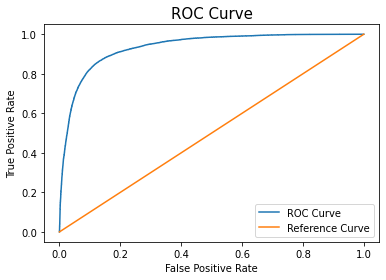

ROC AUC Score: 0.93


In [ ]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(pred['True_values'], pred['Predicted_prob'])
plt.plot(fpr,tpr, label='ROC Curve')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1), label='Reference Curve')
plt.title('ROC Curve', fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#ROC AUC Score
print('ROC AUC Score:',round(roc_auc_score(pred['True_values'], pred['Predicted_prob']),2))

#### Threshold cut-offs

In [ ]:
#Building a dataframe to check the predicted values, probabilities and evaluate different thresholds
pred = pd.DataFrame()

#Ground truth values
pred['True_values'] = y_train_smote

#Predicted probabilities
pred['Predicted_prob'] = model.predict_proba(X_train_pca)[:,1]

#Final predictions based on different thresholds
thresh = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresh:
    pred[str(i)] = pred['Predicted_prob'].apply(lambda x: 1 if x>i else 0)

#Checking the final result
pred.head()

,True_values,Predicted_prob,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.472490,1,1,1,1,0,0,0,0,0
1,0,0.822268,1,1,1,1,1,1,1,1,0
2,0,0.030786,0,0,0,0,0,0,0,0,0
3,0,0.056090,0,0,0,0,0,0,0,0,0
4,0,0.072597,0,0,0,0,0,0,0,0,0


#### Sensitivity vs. Specificity vs. Accuracy & Precision vs. Recall

,Threshold,Accuracy,Specificity,Sensitivity/Recall,Precision
0,0.1,0.680771,0.369141,0.992401,0.611363
1,0.2,0.786780,0.600651,0.972908,0.708984
2,0.3,0.833270,0.725114,0.941426,0.774001
3,0.4,0.857035,0.804220,0.909850,0.822924
4,0.5,0.866003,0.859584,0.872422,0.861364
5,0.6,0.861306,0.899042,0.823571,0.890800
6,0.7,0.840728,0.932742,0.748714,0.917573
7,0.8,0.789140,0.961911,0.616369,0.941800
8,0.9,0.647355,0.990371,0.304338,0.969333


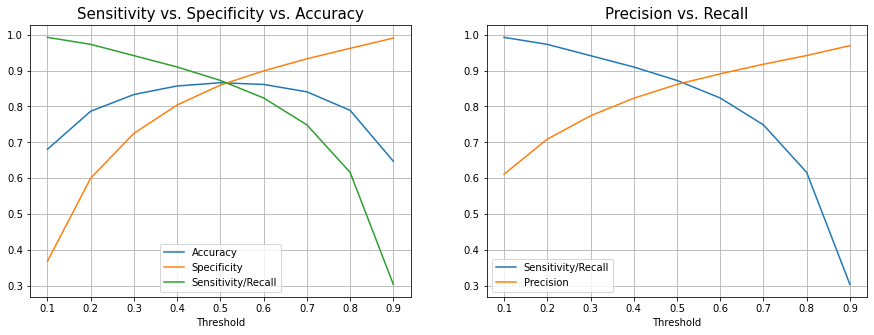

In [ ]:
#Temp variable for index
temp = 0

#Dataframe for storing the metrics
pred_metrics = pd.DataFrame(columns=['Threshold','Accuracy','Specificity','Sensitivity/Recall','Precision'])

#Calculating and appending metric values for the below threshold levels
thresh = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in thresh:
    cm = confusion_matrix(pred['True_values'], pred[str(i)])
    tn = cm[0,0]
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]

    accuracy = (tp+tn)/(cm.sum())
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = tp/(tp+fp)

    pred_metrics.loc[temp] = [i,accuracy,specificity,sensitivity,precision]
    temp = temp+1
    
#Plotting and printing the metric values
fig, ax = plt.subplots(1,2, figsize=(15,5))

#Sensitivity - Specificity - Accuracy
pred_metrics.plot.line(x = 'Threshold', y=['Accuracy','Specificity','Sensitivity/Recall'], grid=True, ax=ax[0])
ax[0].set_title('Sensitivity vs. Specificity vs. Accuracy', fontsize=15)

#Precision - Recall
pred_metrics.plot.line(x = 'Threshold', y=['Sensitivity/Recall','Precision'], grid=True, ax=ax[1])
ax[1].set_title('Precision vs. Recall', fontsize=15)

#Output of the metrics table
pred_metrics

For a slightly higher sensitivity, we can afford moving the __optimum threshold value__ from the meeting point (at 0.52 to 0.48).

#### Applying at the optimum threshold

##### Train set

In [ ]:
#Building a dataframe to check the predicted values, probabilities and evaluate different thresholds
pred_train = pd.DataFrame()

#True values
pred_train['True_values'] = y_train_smote

#Predicted probabilities
pred_train['Predicted_prob'] = model.predict_proba(X_train_pca)[:,1]

pred_train['predicted'] = pred_train['Predicted_prob'].apply(lambda x: 1 if x>0.48 else 0)

#Checking the final result
pred_train.head()

,True_values,Predicted_prob,predicted
0,0,0.472490,0
1,0,0.822268,1
2,0,0.030786,0
3,0,0.056090,0
4,0,0.072597,0


In [ ]:
cm = confusion_matrix(pred_train['True_values'], pred_train['predicted'])
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]

train_accuracy = (tp+tn)/(cm.sum())
train_sensitivity = tp/(tp+fn)
train_specificity = tn/(tn+fp)
train_precision = tp/(tp+fp)

##### Test set

In [ ]:
#Building a dataframe to check the predicted values, probabilities and evaluate different thresholds
pred_test = pd.DataFrame()

#True values
pred_test['True_values'] = y_test

#Predicted probabilities
pred_test['Predicted_prob'] = model.predict_proba(X_test_pca)[:,1]

pred_test['predicted'] = pred_test['Predicted_prob'].apply(lambda x: 1 if x>0.48 else 0)

#Checking the final result
pred_test.head()

,True_values,Predicted_prob,predicted
18325,1,0.895264,1
53049,0,0.143777,0
10295,1,0.827582,1
46412,0,0.031093,0
91397,0,0.267764,0


In [ ]:
cm = confusion_matrix(pred_test['True_values'], pred_test['predicted'])
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]

test_accuracy = (tp+tn)/(cm.sum())
test_sensitivity = tp/(tp+fn)
test_specificity = tn/(tn+fp)
test_precision = tp/(tp+fp)

##### Comparing both scores

,Accuracy,Specificity,Sensitivity/Recall,Precision
Train,0.87,0.85,0.88,0.85
Test,0.83,0.83,0.80,0.28


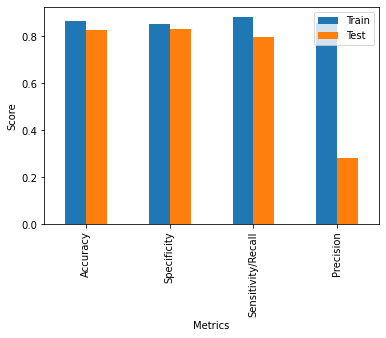

In [ ]:
final_scores = pd.DataFrame(columns=['Accuracy','Specificity','Sensitivity/Recall','Precision'])
final_scores.loc['Train'] = [train_accuracy,train_specificity,train_sensitivity,train_precision]
final_scores.loc['Test'] = [test_accuracy,test_specificity,test_sensitivity,test_precision]

final_scores.T.plot(kind='bar')
plt.xlabel('Metrics')
plt.ylabel('Score')
round(final_scores,2)

--------------------